<a href="https://colab.research.google.com/github/Jsngmm/test-project/blob/main/6%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5%EA%B3%BC%EC%A0%9C_LSTM%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1_%ED%95%98%EB%82%98%ED%88%AC%EC%96%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15, 20)

plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import FinanceDataReader as fdr

In [7]:
hanatour = fdr.DataReader('039130')

In [8]:
hanatour.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-07-04,53000,53800,51200,52100,87918,-0.016981
2022-07-05,52700,54300,52300,53300,79046,0.023033
2022-07-06,53000,54100,52000,52600,72737,-0.013133
2022-07-07,52800,53500,52200,52800,57262,0.003802
2022-07-08,51700,55200,51700,53000,291467,0.003788


In [12]:
STOCK_CODE = '039130'

In [13]:
stock = fdr.DataReader(STOCK_CODE)

In [14]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-11-28,2514,2514,2514,2514,26239,NaN
2000-11-29,2814,2814,2814,2814,4119,0.119332
2000-11-30,3149,3149,2739,2999,5021922,0.065743
2000-12-01,2642,2783,2642,2642,2119037,-0.119040
2000-12-04,2625,2752,2329,2329,1494315,-0.118471


In [15]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-07-04,53000,53800,51200,52100,87918,-0.016981
2022-07-05,52700,54300,52300,53300,79046,0.023033
2022-07-06,53000,54100,52000,52600,72737,-0.013133
2022-07-07,52800,53500,52200,52800,57262,0.003802
2022-07-08,51700,55200,51700,53000,291467,0.003788


In [16]:
stock.index

DatetimeIndex(['2000-11-28', '2000-11-29', '2000-11-30', '2000-12-01',
               '2000-12-04', '2000-12-05', '2000-12-06', '2000-12-07',
               '2000-12-08', '2000-12-11',
               ...
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-04', '2022-07-05', '2022-07-06',
               '2022-07-07', '2022-07-08'],
              dtype='datetime64[ns]', name='Date', length=5338, freq=None)

In [17]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [18]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
2000-11-28,2514,2514,2514,2514,26239,NaN,2000,11,28
2000-11-29,2814,2814,2814,2814,4119,0.119332,2000,11,29
2000-11-30,3149,3149,2739,2999,5021922,0.065743,2000,11,30
2000-12-01,2642,2783,2642,2642,2119037,-0.119040,2000,12,1
2000-12-04,2625,2752,2329,2329,1494315,-0.118471,2000,12,4


Text(0, 0.5, 'price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


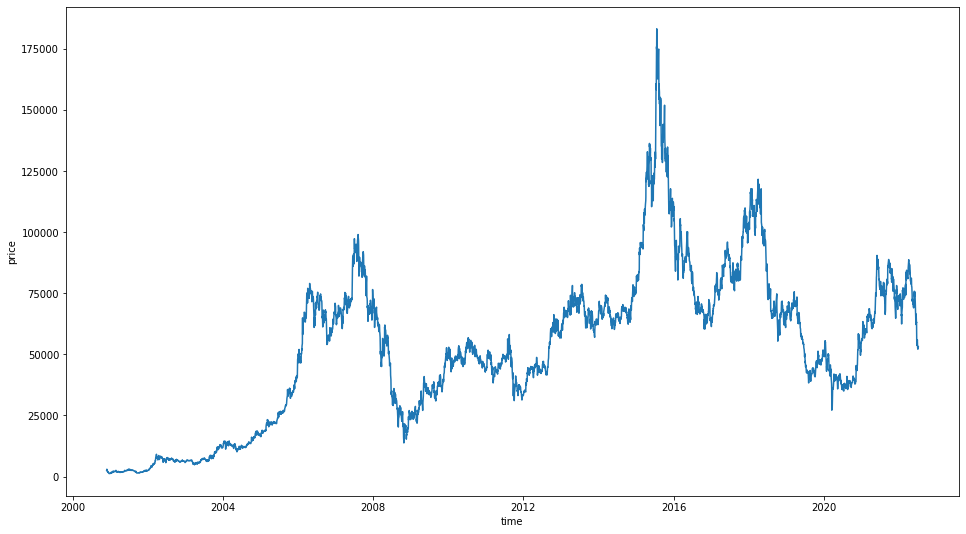

In [19]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

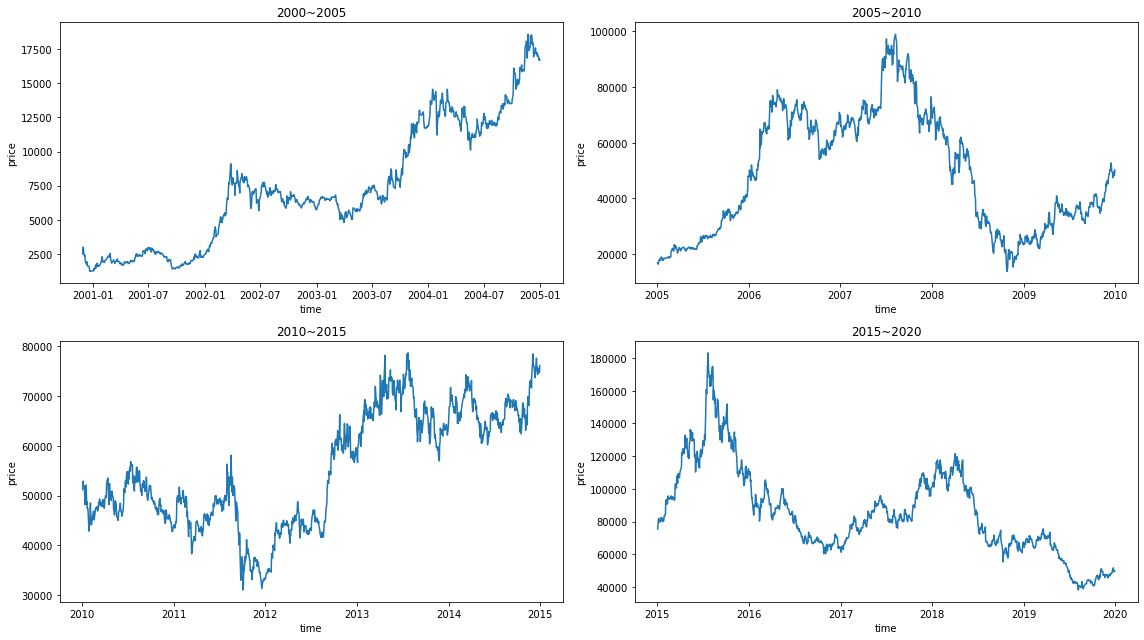

In [22]:
time_steps = [['2000','2005'],
              ['2005','2010'],
              ['2010','2015'],
              ['2015','2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[7.81250000e-03, 6.36168117e-03, 8.03027190e-03, 7.10143733e-03,
        4.61996425e-03],
       [9.47827825e-03, 7.86918856e-03, 9.74248339e-03, 8.75037788e-03,
        2.12597656e-04],
       [1.13383973e-02, 9.55257181e-03, 9.31443052e-03, 9.76722456e-03,
        1.00000000e+00],
       ...,
       [2.88140769e-01, 2.65582601e-01, 2.90465265e-01, 2.82397560e-01,
        1.38845995e-02],
       [2.87030251e-01, 2.62567587e-01, 2.91606739e-01, 2.83496853e-01,
        1.08012361e-02],
       [2.80922397e-01, 2.71110128e-01, 2.88753053e-01, 2.84596147e-01,
        5.74661229e-02]])

In [25]:
df = pd.DataFrame(scaled, columns=scale_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5338 entries, 0 to 5337
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5338 non-null   float64
 1   High    5338 non-null   float64
 2   Low     5338 non-null   float64
 3   Close   5338 non-null   float64
 4   Volume  5338 non-null   float64
dtypes: float64(5)
memory usage: 208.6 KB


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [28]:
x_train.shape, y_train.shape

((4270, 4), (4270,))

In [29]:
x_test.shape, y_test.shape

((1068, 4), (1068,))

In [30]:
x_train

,Open,High,Low,Volume
0,0.007812,0.006362,0.008030,0.004620
1,0.009478,0.007869,0.009742,0.000213
2,0.011338,0.009553,0.009314,1.000000
3,0.008523,0.007713,0.008761,0.421606
4,0.008429,0.007558,0.006974,0.297131
...,...,...,...,...
4265,0.544387,0.501769,0.553986,0.007766
4266,0.552522,0.499317,0.545625,0.020253
4267,0.547097,0.516497,0.562347,0.009634
4268,0.571506,0.518949,0.567923,0.008226


In [31]:
import tensorflow as tf

In [32]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [33]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [34]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [35]:
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [37]:
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [38]:
earlystopping = EarlyStopping(monitor='val_loss', patience=10)

filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [39]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
    132/Unknown - 10s 25ms/step - loss: 6.0406e-04 - mse: 0.0012
Epoch 1: val_loss improved from inf to 0.00028, saving model to tmp/ckeckpointer.ckpt
133/133 [==============================] - 14s 54ms/step - loss: 6.0111e-04 - mse: 0.0012 - val_loss: 2.7722e-04 - val_mse: 5.5444e-04
Epoch 2/50
130/133 [============================>.] - ETA: 0s - loss: 1.6841e-04 - mse: 3.3683e-04
Epoch 2: val_loss improved from 0.00028 to 0.00018, saving model to tmp/ckeckpointer.ckpt
133/133 [==============================] - 4s 28ms/step - loss: 1.7132e-04 - mse: 3.4265e-04 - val_loss: 1.8205e-04 - val_mse: 3.6410e-04
Epoch 3/50
132/133 [============================>.] - ETA: 0s - loss: 1.4864e-04 - mse: 2.9729e-04
Epoch 3: val_loss improved from 0.00018 to 0.00015, saving model to tmp/ckeckpointer.ckpt
133/133 [==============================] - 5s 32ms/step - loss: 1.4966e-04 - mse: 2.9932e-04 - val_loss: 1.5316e-04 - val_mse: 3.0633e-04
Epoch 4/50
131/133 [============================>

In [40]:
model.load_weights(filename)

In [41]:
pred = model.predict(test_data)

In [42]:
pred.shape

(1048, 1)

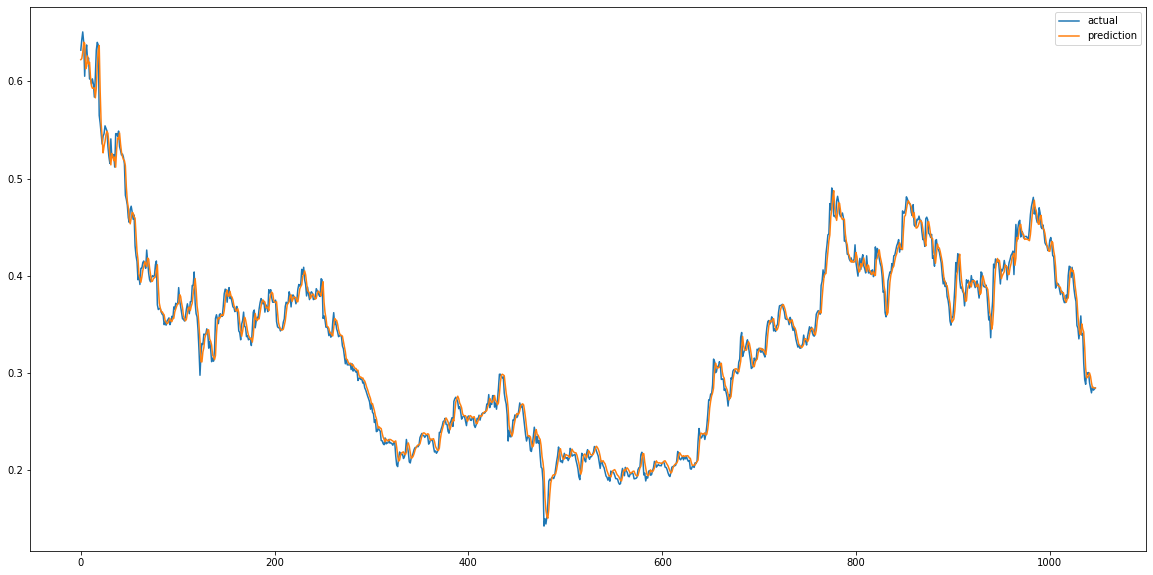

In [43]:
plt.figure(figsize=(20, 10))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()